# Tarea 1 Bioinformática       
##### Míriam Blay Benach

## Preparación del ambiente de computación

Será necesario:

1. Instalar BLAST.
2. Descomprimir el archivo taxdb.btd.gz


In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Introducción
El objetivo del análisis de esta tarea es estudiar la distribución taxonómica de las secuencias homólogas de las proteínas humanas CHRM1, CHRNA3 y CHRNA7. Estas proteínas trabajan como neuroreceptores de acetilcolina tanto de tipo muscarínico (CHRM1) como nicotínico (CHRNA3 y CHRNA7). 
Evidencias desucubiertas recientemente por Viscardi et al (2021) indicarían que estas proteínas aparecieron en el linaje del último ancestro común entre los cordados y los cnidarios y que por tanto, no habría homologías en linajes anteriores.

Para facilitar la comprensión de los resultados y mantener la extensión del trabajo, vamos a estudiar los resultados de dos de estas proteínas, en este caso de CHRM1 y CHRNA7 para comprender las diferencias, si las hubiera, entre los receptores muscarínicos y nicotínicos. 

## Métodos
Para llevar a cabo el procedimiento de búsqueda de homologías vamos a utilizar la base de datos de secuencias Swissprot, que se encuentra previamente instalada en este ambiente de trabajo.

Además utilizaremos **blastp** (Altschul *et al.*, 1990) que permite la identificación de regiones comunes o de dominios compartidos entre las proteínas así como la recolección de proteínas relacionadas para hacer análisis filogenéticos. Para ello, partiremos de diferentes umbrales de valor E, para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que relajamos el grado de similitud exigido. Es decir, a medida que acepto como resultados del **blastp** secuencias con un valor E mayor. 
También realizaremos un alineamiento de las secuencias de los diferentes organismos obtenidos en el blastp por medio de las funciones del paquete **DECIPHER** que deberemos instalar también en nuestro entorno R.


## Resultados
### BLASTP individual
Para empezar, ejecuto una única búsqueda con **blastp**, usando un valor E de 1.0e-50, que es muy exigente: sólo las secuencias extremadamente parecidas a la original aparecerán en los resultados.

In [2]:
## BLASTP de la Proteína CHRM1
BlastpOutCHRM1 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                               '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# El resultado del comando anterior, guardado como "BlastpOutCHRM1", contiene información de tipo texto plano. 
#A partir de las funciones textConnection() y read.table(), lo trasformamos en un "data frame", una tabla donde cada columna es una variable. 

TablaOutCHRM1 <- read.table(textConnection(BlastpOutCHRM1),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOutCHRM1)

[1] 37 11

In [3]:
TablaOutCHRM1

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


In [4]:
## BLASTP de la Proteína CHRNA7

BlastpOutCHRNA7 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA7.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# Generamos un dataframe.
TablaOutCHRNA7 <- read.table(textConnection(BlastpOutCHRNA7),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOutCHRNA7)


[1] 120  11

In [5]:
TablaOutCHRNA7

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


La tabla de resultados de la proteína CHRM1 incluye 37 secuencias encontradas, incluyendo la misma secuencia usada como *query*. La segunda proteína estudiada, CHRNA7,  muesta 121 especies encontradas con alta homología. 

Los resultados obtenidos por este **blastp** son lógicos en ambas proteínas. Como ya hemos indicado, hemos dado un valor muy restrictivo al valor E por tanto entendemos los resultados como verdaderas homologías. Los primeros resultados en ambas proteínas son homologías con secuencias de organismos muy cercanos del mismo filo de los cordados, como lo son por ejemplo, otros primates, roedores e incluso algunas especies del orden de los artiodáctilos. 

Más abajo de la tabla, cuando los resultados son más 'relajados' ya encontramos homologías con organismos del filo de los moluscos, artrópodos o de los nematodos como Caenorhabditis briggsae o Caenorhabditis elegans. Estos últimos estan más alejados de los cordados, no obstante filogenéticamente siguen siendo posteriores a ese último ancetro común entre cordados y cnidarios.


Estos son los significados de las distintas columnas de la tabla generada con el blastp:

- **saccver**: número de acceso o identificador de la secuencia encontrada (*subject*).
- **pident**: porcentaje de identidad entre la *query* y el *subject* en su alineamiento local.
- **length**: longitud del alineamiento entre *query* y *subject*.
- **qstart**: primera posición de la *query* alineada.
- **qend**: última posición alineada en la *query*.
- **sstart**: primera posición de la *subject* alineada.
- **send**: última posición de la *subject* alineada.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la *subject*, en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la *subject*.
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la *subject*, usado para facilitar la interpretación.

 

A continuación vamos a probar a realizar otro **blast menos restrictivo** de la porteína CHRM1, para ver si de esta forma sí encontramos alguna proteína que tenga homología en especies más alejadas. Para realizarlo vamos a utilizar un **E=1.0e-1**.
Es por eso que veremos como aumentan los resultados obtenidos (dimensiones de la tabla=748)

In [6]:
## BLASTP de la Proteína CHRM1
BlastpOutCHRM1.2 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-1',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)
TablaOutCHRM1.2 <- read.table(textConnection(BlastpOutCHRM1.2),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOutCHRM1.2)

[1] 748  11

In [7]:
TablaOutCHRM1.2

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


En este nuevo blast ha aparecido una homología con un virus de Sheeppox virus KS-1. Lo más probable es que la semejanza real entre las dos secuencias de proteínas sea muy baja y el blast indique una coinciendencia debido al propio reconocimiento del algoritmo.

In [8]:
comparativa<- TablaOutCHRM1.2 [c(1,744),]
comparativa

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
744,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses


Vamos a realizar un alineamiento de las proteínas de este blasp. Primero nos interesará obtener una lista con todos los identificadores de las proteínas que tienen homología cuando el valor E=1.0e-1. Posteriormente con la función `blastdbcmd` obtendremos un archivo fasta con todas las secuencias encontradas en el blast. 
Con estas secuencias ya podremos realizar el alineamiento y observar que regiones de la proteína humana CHMR1 se alienean con el resto de proteínas.

In [9]:
## BLASTP para obtener todos los ID de la homología con la proteína humana CHRM1
IdCHRM1 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-1',
                               '-out', 'listahom.txt',
                              '-outfmt', '"6 saccver"'),
                   wait = TRUE)

TablaIDCHRM1 <- read.table(textConnection('listahom.txt'),
                        col.names = 'saccver')

In [10]:
SecuenciaH.CHRM1<-system2(command = 'blastdbcmd',
                      args = c('-db', 'swissprot',
                              '-entry_batch', 'listahom.txt',
                            '-out', 'BlastH.CHRM1.fas'))

### ALINEAMIENTO 
Vamos a alinear las secuencias obtenidas por el blast de la porteína CHRM1 para observar si la homología encontrada en virus es una homogía de regiones conservadas o no. 
Para ello instalaremos el paquete `DECIPHER` y seguiremos con el proceso para leer las secuencias con readAAStringSet.

In [11]:
suppressMessages(library('DECIPHER'))
fastaFile<- 'BlastH.CHRM1.fas'
secAA1 <- readAAStringSet(fastaFile)
secAA1

  A AAStringSet instance of length 748
      width seq                                             names               
  [1]   460 MNTSAPPAVSPNITVLAPGKGP...KRRWRKIPKRPGSVHRTPSRQC P11229.2 RecName:...
  [2]   460 MNTSAPPAVSPNITVLAPGKGP...KRRWRKIPKRPGSVHRTPSRQC P56489.1 RecName:...
  [3]   460 MNTSAPPAVSPNITVLAPGKGP...KRRWRKIPKRPGSVHRTPSRQC Q5R949.1 RecName:...
  [4]   460 MNTSAPPAVSPNITVLAPGKGP...KRRWRKIPKRPGSVHRTPSRQC P04761.1 RecName:...
  [5]   460 MNTSVPPAVSPNITVLAPGKGP...KRRWRKIPKRPGSVHRTPSRQC P12657.2 RecName:...
  ...   ... ...
[744]   381 MNYTLSTVSSATMYNSSSNITT...REFTKKLLRLRTTSSAGSISIG Q86917.1 RecName:...
[745]   343 MDLTYIPEDLSSCPKFVNKILS...YIVSGKIFSSHSETANLFPEAH Q9P1P4.1 PUTATIVE...
[746]   343 MDLTYIPEDLSSCPKFVNKILS...YIVSGKIFSSHSETANLFPEAH Q9P1P4.1 PUTATIVE...
[747]   522 MNSFFGTPAASWCLLESDVSSA...AEKPQQELVMEELKETTNSSEI Q9Y5X5.2 RecName:...
[748]   522 MNSFFGTPAASWCLLESDVSSA...AEKPQQELVMEELKETTNSSEI Q9Y5X5.2 RecName:...

In [12]:
#Alineamos las secuencias
alineamientoAA1<- AlignSeqs(secAA1)
alineamientoAA1


Determining distance matrix based on shared 5-mers:

Time difference of 9.48 secs

Clustering into groups by similarity:

Time difference of 0.49 secs

Aligning Sequences:

Time difference of 19.51 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 2.63 secs

Reclustering into groups by similarity:

Time difference of 0.41 secs

Realigning Sequences:

Time difference of 9.52 secs

Iteration 2 of 2:

Determining distance matrix based on alignment:

Time difference of 2.52 secs

Reclustering into groups by similarity:

Time difference of 0.43 secs

Realigning Sequences:

Time difference of 7.18 secs

Refining the alignment:

Time difference of 15.23 secs



  A AAStringSet instance of length 748
      width seq                                             names               
  [1]  2793 ----------------------...---------------------- P11229.2 RecName:...
  [2]  2793 ----------------------...---------------------- P56489.1 RecName:...
  [3]  2793 ----------------------...---------------------- Q5R949.1 RecName:...
  [4]  2793 ----------------------...---------------------- P04761.1 RecName:...
  [5]  2793 ----------------------...---------------------- P12657.2 RecName:...
  ...   ... ...
[744]  2793 ----------------------...---------------------- Q86917.1 RecName:...
[745]  2793 ----------------------...---------------------- Q9P1P4.1 PUTATIVE...
[746]  2793 ----------------------...---------------------- Q9P1P4.1 PUTATIVE...
[747]  2793 MNSFFG----------TPAASW...---------------------- Q9Y5X5.2 RecName:...
[748]  2793 MNSFFG----------TPAASW...---------------------- Q9Y5X5.2 RecName:...

In [13]:
BrowseSeqs(alineamientoAA1, htmlFile='alineamientoAA1.html')
writeXStringSet(alineamientoAA1, 'alineamientoAA1.fas')

Con esto hemos obtenido un alineamiento de las diferentes secuencias obtenidas en blast con un valor E muy relajado. 
Como se puede observar en el alineamiento del archivo html, las últimas secuencias, donde se encuentra la homología con virus, contienen muy pocas regiones con homologías y presenta gaps muy extensos de regiones que no se pueden alinenar. 

Para entender mejor los resultados de este alineamiento nos vamos a valer de la función `StaggerAlignment()` del mismo paquete `DECIPHER`. Durante la evolución molecular, pueden producirse inserciones en linajes independientes, pero en posiciones próximas a las de la secuencia que estudiamos. De esta forma el alineamiento puede considerar homólogas regiones que en realidad no lo son cerca de donde se encuentran los gaps. Es para ello que usamos la función `StaggerAlignment()`, donde realizaremos otro alineamiento a partir de alineamientoAA1, en el que se evitan las falsas homologías.

In [14]:
alineamientoAA2 <- StaggerAlignment(alineamientoAA1, verbose=FALSE)
alineamientoAA2
BrowseSeqs(alineamientoAA2, htmlFile='alineamientoAA2.html')

  A AAStringSet instance of length 748
      width seq                                             names               
  [1]  9223 ----------------------...---------------------- P11229.2 RecName:...
  [2]  9223 ----------------------...---------------------- P56489.1 RecName:...
  [3]  9223 ----------------------...---------------------- Q5R949.1 RecName:...
  [4]  9223 ----------------------...---------------------- P04761.1 RecName:...
  [5]  9223 ----------------------...---------------------- P12657.2 RecName:...
  ...   ... ...
[744]  9223 ----------------------...---------------------- Q86917.1 RecName:...
[745]  9223 ----------------------...---------------------- Q9P1P4.1 PUTATIVE...
[746]  9223 ----------------------...---------------------- Q9P1P4.1 PUTATIVE...
[747]  9223 MNSFFG---------------T...---------------------- Q9Y5X5.2 RecName:...
[748]  9223 MNSFFG---------------T...---------------------- Q9Y5X5.2 RecName:...

Ahora hemos conseguido dos alineamientos distintos **AlinemientoAA1** y **AlienmientoAA2**. Ambos contienen la lista completa de las homologías obtenidas en el blastp de la porteína CHRM1, pero el segundo contiene las homologías reales de los aminoácidos alineados.

Es por eso que en el segundo alineamiento cuando nos fijamos en las proteínas que se encuentran más bajo en la lista observamos regiones más cortas de homología de entre 3 y 5 aminoácidos y regiones de gaps que siguen sindo muy extensas. No obstante, siguen existendo regiones de bloques de unos 20 aminoácidos alineados que se podrían enteder como zonas conservadas de la proteína. Más tarde veremos gráficamente si estas zonas son más o menos conservadas o si por el contario la cantidad de aminoácidos alineados no es sufuciente para determiar esta homología.

### BLASTP en serie
Aun que ya hemos probado a variar manualmente el valor E, existe una funcion llamada `lapply()` que permite hacer esta busqueda de forma automática y así obtener todos los resultados dentro de distintos valores de E. Con el objeto Valores_E_max determinamos los distintos valores con los que realizaremos los **blastp**.

In [15]:
#CHRM1
Valores_E_max <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')
Lista_de_TablasCHRM1 <- lapply(Valores_E_max,
                          function(x) {
                              BlastpOutCHRM1 <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                 read.table(textConnection( BlastpOutCHRM1),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

In [16]:
#Realizamos lo mismo con la porteína CHRNA7
Valores_E_max <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

Lista_de_TablasCHRNA7 <- lapply(Valores_E_max,
                          function(x) {
                              BlastpOutCHRNA7 <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA7.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                 read.table(textConnection( BlastpOutCHRNA7),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

El objeto `Lista_de_Tablas` guarda las tablas de resultados de los diez **blastp** ejecutados y podemos acceder cada una de estas tablas con:
Dentro del doble corchete indicamos cual es la tabla que nos interesa visualizar.

In [17]:
#CHRM1
tail(Lista_de_TablasCHRM1[[6]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
572,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses
573,Q9P1P4.1,23.834,193,42,225,48,234,1.47e-09,9606,Homo sapiens,primates
574,Q9Y5X5.2,27.338,139,22,160,144,280,1.58e-09,9606,Homo sapiens,primates
575,Q6W3F4.1,30.709,127,39,165,21,145,1.87e-09,9615,Canis lupus familiaris,carnivores
576,Q64077.1,28.221,163,2,163,9,169,1.88e-09,10141,Cavia porcellus,rodents
577,P32302.1,27.835,194,17,204,43,234,1.99e-09,9606,Homo sapiens,primates


In [18]:
#CHRNA7
tail(Lista_de_TablasCHRNA7[[10]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
260,Q8BHJ7.1,19.617,209,65,258,87,285,0.031,10090,Mus musculus,rodents
261,P19969.1,19.617,209,65,258,87,285,0.034,10116,Rattus norvegicus,rodents
262,P31644.1,19.617,209,65,258,87,285,0.042,9606,Homo sapiens,primates
263,Q08E50.1,19.617,209,65,258,87,285,0.064,9913,Bos taurus,even-toed ungulates
264,Q17328.1,20.495,283,4,266,3,282,0.180,6239,Caenorhabditis elegans,nematodes
265,P41849.3,24.615,130,147,273,154,281,0.360,6239,Caenorhabditis elegans,nematodes


Para saber cuántas secuencias homólogas ha encontrado **blastp** en la base de datos con cada valor del parámetro `-evalue`, aplico la función `dim()` que devuelve las dimensiones del objeto en cuestión (número de filas y de columnas) y me quedo con el número de filas:
Observamos como aumenta este valor cuanto más grande es el valor E. 

In [19]:
#CHRM1
Num.resultadosCHRM1 <- sapply(Lista_de_TablasCHRM1, function(x) dim(x)[1])
Num.resultadosCHRM1

[1]  37  53  94 249 485 577 647 682 730 774

In [20]:
#CHRNA7
Num.resultadosCHRNA7 <- sapply(Lista_de_TablasCHRNA7, function(x) dim(x)[1])
Num.resultadosCHRNA7

[1] 120 123 129 129 160 171 191 221 252 265

Ahora podemos representar como varia la cantidad de porteínas homológas encontradas con cada uno de los blastp (distintos valores de E probados).

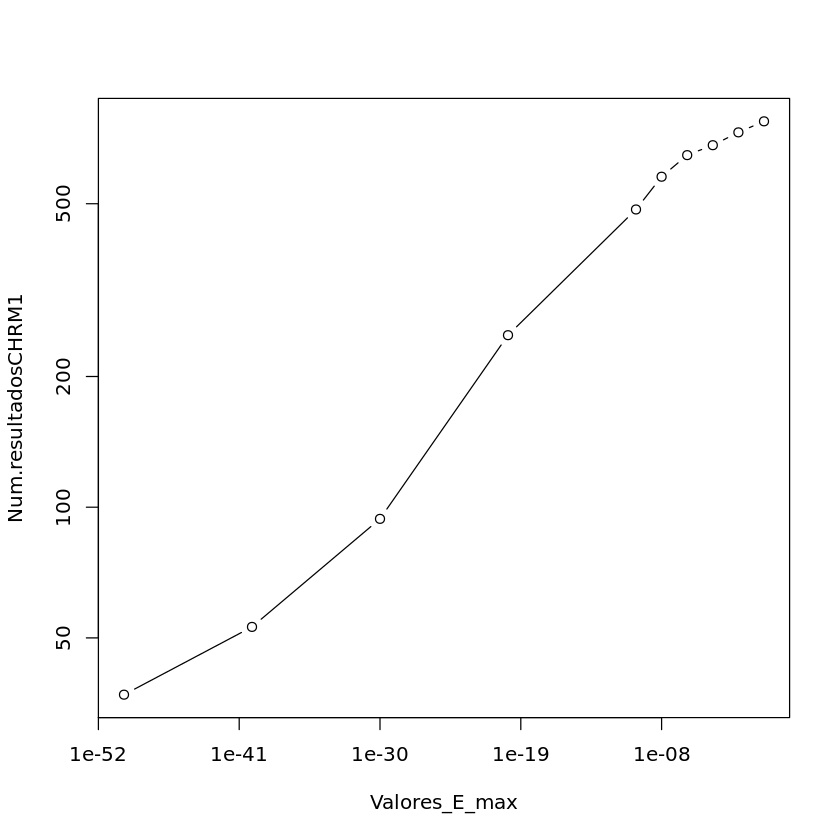

In [21]:
#CHRM1
plot(Valores_E_max, Num.resultadosCHRM1, log = 'xy', type = 'b',)

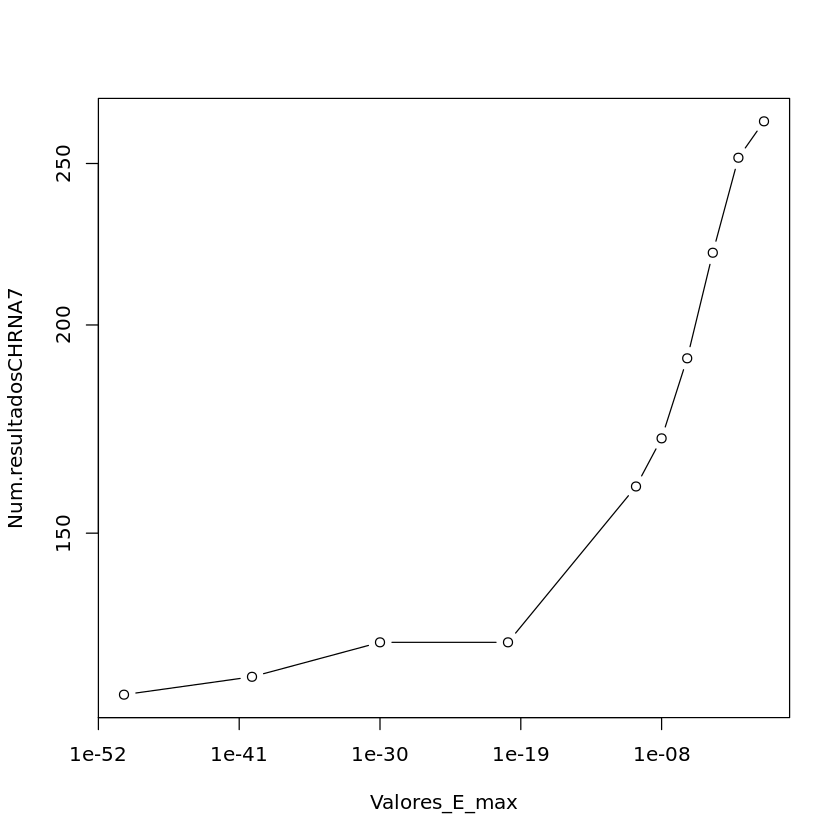

In [22]:
#CHRNA7
plot(Valores_E_max, Num.resultadosCHRNA7, log = 'xy', type = 'b',)

A continuación examinamos la relación entre la longitud (length) del alineamiento y el valor E de los resultados guardados en la última tabla (10) con la que hemos usado un valor E=1. De esta froma vemos si los alinemientos son de regiones más extensas de la proteínas, o si por el contrario se restringe a zonas concretas de la secuencias. 

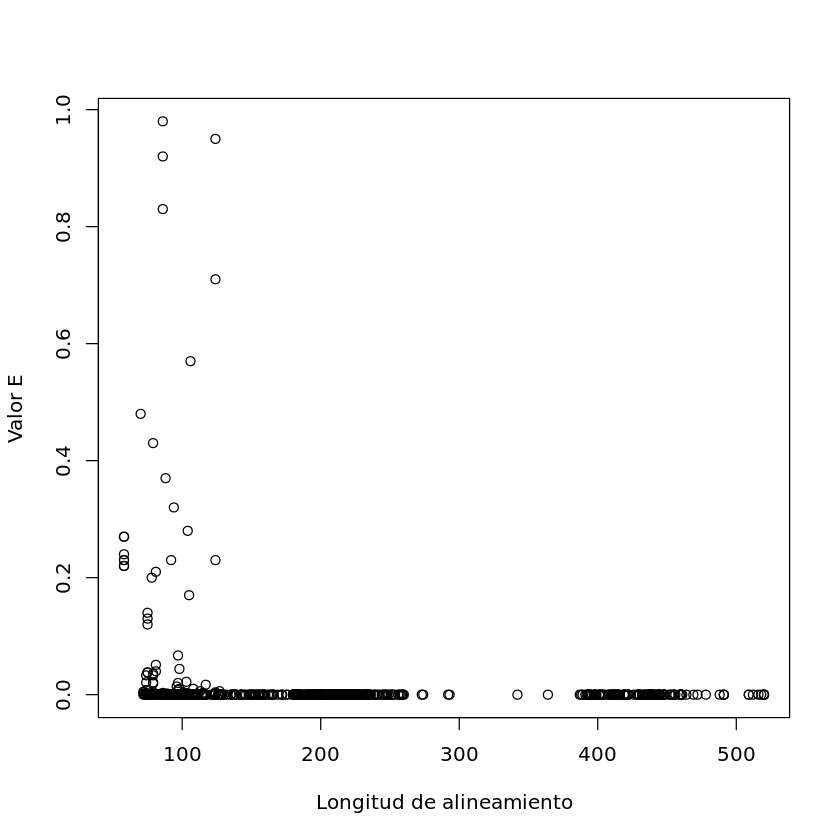

In [23]:
#CHRM1
plot(Lista_de_TablasCHRM1[[10]]$length, Lista_de_TablasCHRM1[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

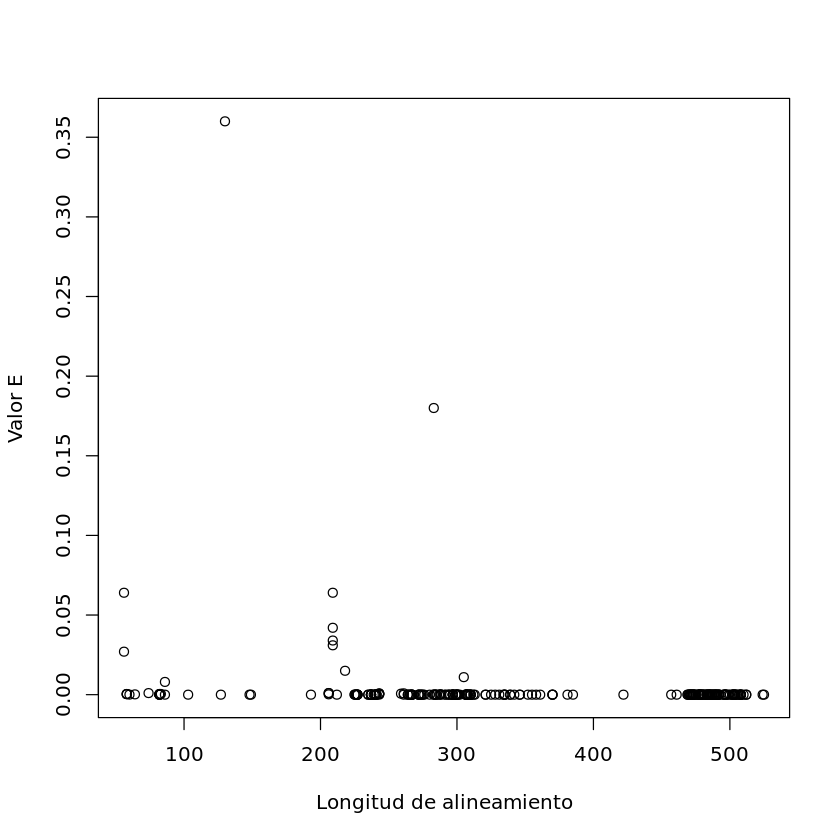

In [24]:
#CHRNA7
plot(Lista_de_TablasCHRNA7[[10]]$length, Lista_de_TablasCHRNA7[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Nuestra proteína **CHRM1** tiene 460 aminoácidos aproximadamente. Cuando los valores de E son más bajos y las homologías más exactas podemos encontrar alineamientos de diferentes longitudes pero se concentran sobretodo en alineamientos de menos de 300 aminoácidos. 
Por el contrario, cuando los resultados obtenidos son con valores de E más elevados, vemos que todos los alineamientos son debidos a regiones de menos de 150 aa. Aunque estos podrían deberse a zonas conservadas de la proteína, podrían también ser simples alineamientos en regiones muy pequeñas y separadas de la proteína. 
Como ya hemos visto en nuestro 'AlinemientoAA2' hay bloques mas o menos conservados en estas porteínas pero también hay regiones más aleatorias alienadas que no determinarían homología real.

En cuanto a la proteína **CHRNA7** que contiene 500 aminácidos, existe una mayor variedad de longitud de alineamiento cuando E es muy restrictivo. No obstante podemos inferir que los resultados se concentran tanto en alineamientos de más de 450 aa y de entre 250 y 300 aa. Cuando más aumentamos los valores de E, se van reduciendo los resultados y los alineamientos observados son de regiones muy cortas, de menos de 100 aa aproximadamente. 

### Posiciones en las que encontramos los alineamientos



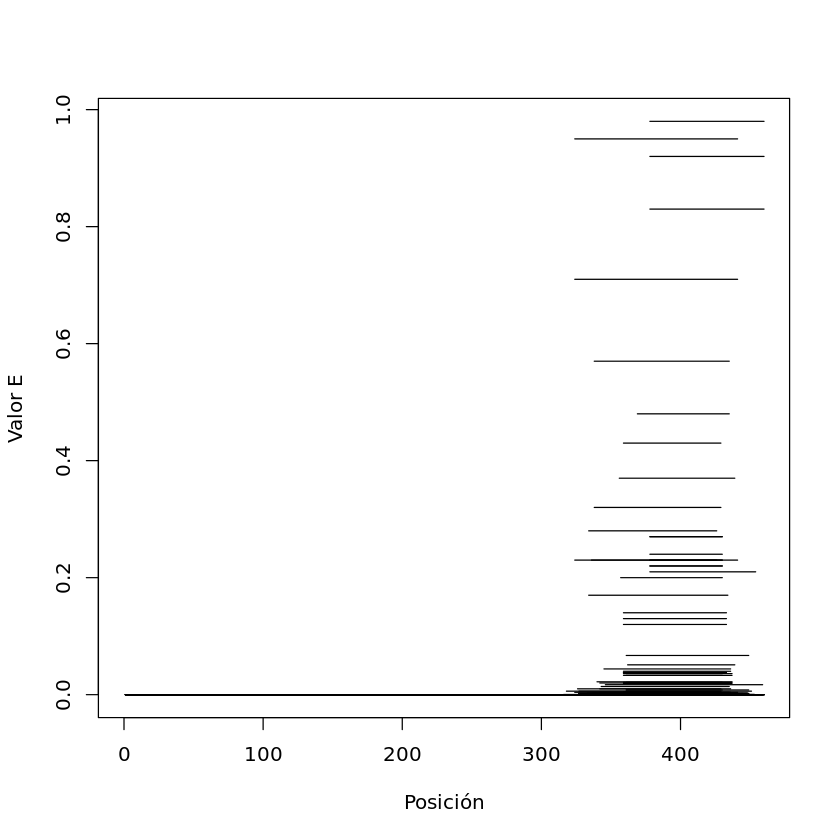

In [25]:
#CHRM1
inicios <- Lista_de_TablasCHRM1[[10]]$qstart
finales <- Lista_de_TablasCHRM1[[10]]$qend
valoresE <- Lista_de_TablasCHRM1[[10]]$evalue

AlineamientoMaximo <- max(Lista_de_TablasCHRM1[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

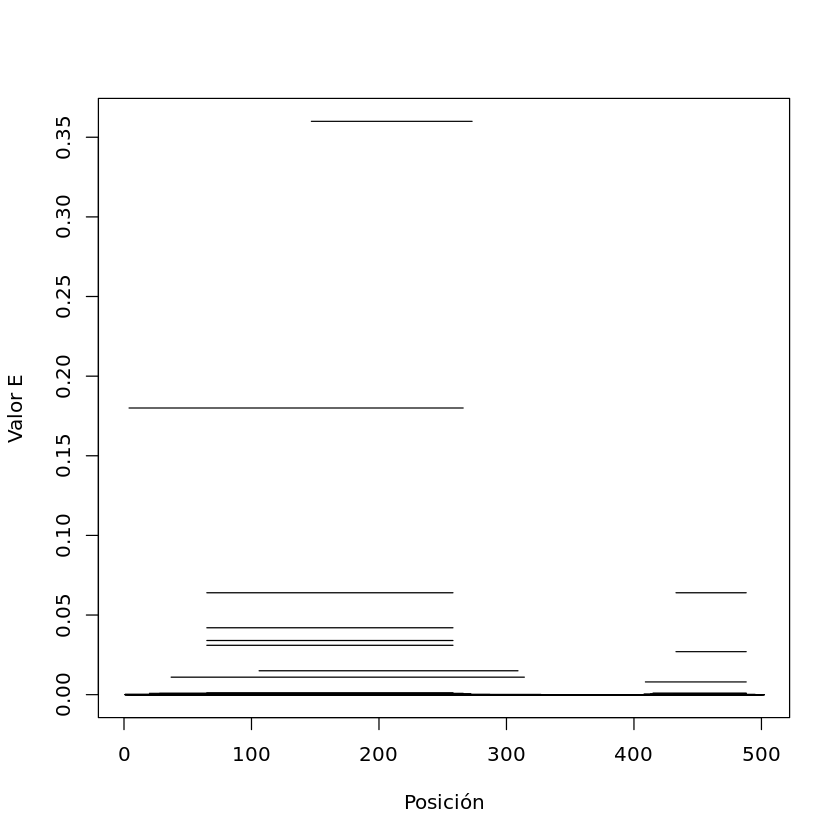

In [26]:
#CHRNA7
inicios <- Lista_de_TablasCHRNA7[[10]]$qstart
finales <- Lista_de_TablasCHRNA7[[10]]$qend
valoresE <- Lista_de_TablasCHRNA7[[10]]$evalue

AlineamientoMaximo <- max(Lista_de_TablasCHRNA7[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

En la gráfica de **CHRM1** observamos que la región que presenta mayor homología, independientemente del valor E, son las regiones que comprenden las posiciones aminoadicas 320 y 460aa, en este caso si tenemos indicione de que xistan regiones conservadas en esa zona de las secuencias. 
En el caso de la porteína **CHRNA7** sucede algo similar. Los alineamientos con valores de E restrictivos se posicionan principalmente en las regiones de 100 a 250 aa y en el fragmento final de 400 a 500 aa. En cuanto a los alineamientos con valores E más relajados estos valores varian un poco y se centran la posición 150 a 200. Debido a la escasez de resultados en esta proteína no podemos indicar con tanta certeza que exista una región conservada como tal. 

Por último, vamos a a observar cual es la distribución taxonómica de las secuencias encontradas con cada valor de E aplicado. 

In [27]:
#CHRM1
lapply(Lista_de_TablasCHRM1, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [28]:
#CHRNA7
lapply(Lista_de_TablasCHRNA7, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

Con la función aplicada obtenemos uan lista donde aparece el recuento de los distintos grupos taxonómicos que aparecen en los resultados del **blastp**.

Como ya sabemos **CHRM1** y **CHRNA7** son dos receptores de actetil colina de humanos, y como es lógico esperamos encontrar muchas homologías en otros organismos que posean un sistema nerviosos similar al nuestro. Hemos observado también homologías con nematodos, por ejemplo, que estan mucho más cercanos a los cnidarios y cuyo sistema nerviso se compone de un anillo nervioso alrededor de la faringe del que parten cordones nerviosos longitudinales.

Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, repetimos el recuento de grupos taxonómicos pero contando solamente las secuencias con un alineamiento de al menos 230 aa para CHRM1 y 300 aminoácidos para CHRNA7, que corresponde con la mitad de sus secuncias aproximadamente:

In [29]:
#CHRM1
lapply(Lista_de_TablasCHRM1, function(x) {
       filtro <- x$length >= 230
       table(x[filtro, 'sblastname']) })

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [30]:
#CHRNA7
lapply(Lista_de_TablasCHRNA7, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname']) })

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

## Discusión

Después de realizar el **blastp** de las proteínas humanas CHRM1 y CHRNA7 hemos encontrado una gran variedad de homólogos en muchas especies distintas y en filos muy variados, como por ejemplo, artrópodos, nematodos o moluscos. En cuanto a CHRM1, de 460 aminoácidos, hemos podido observar que existe una zona de su secuencia, entre los 300 y 450 aminoácidos, donde se encuentran la mayoría de las homologías con las otras proteínas del blastp, lo cual nos indica una posible región conservada que está muy bien definida. Debido a que los resultados para CHRNA7 no son tan esclarecedores no podemos hacer la misma afirmación, aun así podemos identificar que para algunos valores E más bajos si existe una zona entre los 100 y 200 aminoácidos que se encuentra más alineada. 
Independientemente del tipo de proteína estudiada nunca hemos encontrado homologías de más de cien aminoácidos y con un valor de E razonable que indicaran homologías con otros filos anteriores al último ancestro común entre cnidarios y cordados, por tanto, se confirmaba nuestra sospecha para estas proteínas.

En el segundo blastp para CHRM1 hemos encontrado una homología con virus (ID:Q86917.1) Sheeppox virus KS-1, pero esta no llega a alinear más de 230 aminoácidos, ni su alineamiento es robusto como para determinar homología con un organismo tan distinto .

Aunque podría resultar complicado de entender, la existencia de homologías con proteínas de organismos aneurales ha sido encontrada en algunos tipos de receptores y neurotransmisores sinápticos. Como ya hemos establecido en la introducción, el último ancestro común de CHRM1 y CHRNA7 se encuentra en el nodo entre los cnidarios y los cordados. Esto es así ya que estos receptores son o bien receptores metabotropicos de tipo acetilcolina (CHRM) o los receptores ionotropicos neuroexclusivos (CHRN) cuyo origen data exclusivamente del último ancestro común entre humanos y cnidarios. Además, pocos de estos nodos de neurotransmisión se han formado después de este último ancestro común.

No obstante, esto no sucede igual para todas las familias de receptores de neurotransmisores ni en la evolución de todos los neurotransmisores. Viscardi et al (2021) concluyen en el estudio que el arquetipo genético del entramado sináptico tuvo su origen en el último ancestro común entre los **ctenoforos** y los humanos y que su desarrollo proporcionado por los receptores ionotroficos (que son los únicos que poseen los ctenoforos) puede haber sido esencial para la evolución de las sinapsis. No debemos dejar de lado la existencia de ortólogos de receptores ionotropicos en filos como el de los placozoos que por su parte no poseen neuronas. Debemos comprender que estas homologías son debidas a que estos neurotransmisores y receptores sinápticos participaron en procesos celulares como la señalización celular y que evolucionaron posteriormente hasta llegar a su función en el sistema nervioso.

Por tanto, aunque debido a la clasificación de estas proteínas no podemos encontrar homólogo con filos anteriores a cnidarios, si podríamos encontrar estas homologías en otras familias de receptores de neurotransmisión que evolucionaron anteriores a estos.


## Referencias
- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira
Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular
Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252.
- LAST® Command Line Applications User Manual [Internet]. Bethesda (MD): National Center for Biotechnology Information (US); 2008-. Table C10: [Blastdbcmd application options. This application reads a BLAST database and produces reports.]. Available from: https://www.ncbi.nlm.nih.gov/books/NBK279684/table/appendices.T.blastdbcmd_application_opti/
- Wright, E. S. (2015). DECIPHER: harnessing local sequence context to improve proteinmultiple sequence alignment. BMC Bioinformatics, 16, 322. http://doi.org/10.1186/s12859-015-0749-z
- Altschul, S. F., Gish, W., Miller, W., Myers, E. W., & Lipman, D. J. (1990) Basic local alignment search tool. Journal of Molecular Biology. 215, 403-410.


